In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

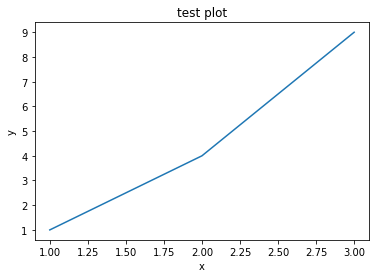

In [8]:
x = [1,2,3]
y = [1,4,9]
plt.plot(x,y)
plt.title("test plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
text_cls = pd.read_table("SMSSpamCollection", header = None)

In [20]:
text_cls

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
type(text_cls)

pandas.core.frame.DataFrame

In [25]:
print(text_cls.info())
print(text_cls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
0    5572 non-null object
1    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [26]:
#check class distribution

In [32]:
classes = text_cls[0] #first colum of our dataframe
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


In [29]:
#preprocessing the data

In [30]:
#convert class labels to binary values; 0 = ham, 1 = spam

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Y = encoder.fit_transform(classes)

print(classes[:10])
print(Y[:10])

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: 0, dtype: object
[0 0 1 0 0 1 0 0 1 1]


In [36]:
#store the sms message data

In [41]:
text_messages = text_cls[1]
print (text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


In [42]:
#using regular expressions to replace email addresses, urls, phone numbers, other numbers, symbols

In [53]:
#replacing email addresses with 'emailaddr'
processed = text_messages.str.replace('^\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,3}$', 'emailaddr')

#replacing urls with 'webaddress'
processed = processed.str.replace('^[a-zA-Z0-9\-\.]+\.(com|org|net|mil|edu|COM|ORG|NET|MIL|EDU)$', 'webaddress')

#replacing money symbol with 'moneysymb'
processed = processed.str.replace('^\$[0-9]+(\.[0-9][0-9])?$', 'moneysymb')

#replacing 10 digit number with 'phonenumber'
processed = processed.str.replace('^[2-9]\d{2}-\d{3}-\d{4}$', 'phonenumber')

#replacing normal numbers with 'number'
processed = processed.str.replace('^([\+][0-9]{1,3}([ \.\-])?)?([\(]{1}[0-9]{3}[\)])?([0-9A-Z \.\-]{1,32})((x|ext|extension)?[0-9]{1,4}?)$', 'number')

In [54]:
processed = processed.str.lower()
print(processed)

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: 1, Length: 5572, dtype: object
